#HotDog-NotHotDog!
This project is inspired by the fictional app Seefood created on HBO's Silicon Valley. The idea of the app is to work as a simple image classifier to identify an image as either a hotdog or not a hotdog. This attempt at classification is built using a 4-layer deep neural network with Relu Activation for the hidden layers and sigmoid for the classification output layer. The model is derived from an exercise in Andrew Ng's Neural Networks and Deep Learning course from deeplearning.ai. The dataset of hotdog images comes from https://www.kaggle.com/dansbecker/hot-dog-not-hot-dog/data.

**Data Pre-processing**


In [4]:
#import my google drive
from google.colab import drive
drive.mount('/content/drive')

#import file navigation libraries
import os
import zipfile

#open the zipfile
zip_ref = zipfile.ZipFile("/content/drive/My Drive/HotDogNotHotDog/hot-dog-not-hot-dog.zip")
zip_ref.extractall("/tmp")
zip_ref.close()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#import data-science libraries
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

In [0]:
# store root directories
base_dir = '/tmp/seefood'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

#train and test directories
train_hotdog_dir = os.path.join(train_dir, 'hot_dog')

train_nothotdog_dir = os.path.join(train_dir, 'not_hot_dog')

test_hotdog_dir = os.path.join(test_dir, 'hot_dog')

test_nothotdog_dir = os.path.join(test_dir, 'not_hot_dog')

In [7]:
#arrays of fileneames for different datagroups (train_x, train_y, test_x, test_y)
train_hotdog_fnames = os.listdir(train_hotdog_dir)
train_nothotdog_fnames = os.listdir(train_nothotdog_dir)
test_hotdog_fnames = os.listdir(test_hotdog_dir)
test_nothotdog_fnames = os.listdir(test_nothotdog_dir)


print(train_hotdog_fnames[:10])
print(train_nothotdog_fnames[:10])

['3495622.jpg', '1098632.jpg', '116486.jpg', '127117.jpg', '1143044.jpg', '3750744.jpg', '979767.jpg', '3798465.jpg', '910098.jpg', '1344958.jpg']
['188505.jpg', '93653.jpg', '98617.jpg', '319830.jpg', '96935.jpg', '274368.jpg', '236973.jpg', '185190.jpg', '89502.jpg', '178804.jpg']


In [8]:
#show our dataset sizes
print('total training hotdog images:', len(os.listdir(train_hotdog_dir)))
print('total training nothotdog images:', len(os.listdir(train_nothotdog_dir)))
print('total test hotdog images:', len(os.listdir(test_hotdog_dir)))
print('total test nothotdog images:', len(os.listdir(test_nothotdog_dir)))

total training hotdog images: 249
total training nothotdog images: 249
total test hotdog images: 250
total test nothotdog images: 250


In [0]:
#create arrays with the image represented as resized pixel arrays 

def fillArrays(filename_set, directory, output_val, img_size):
  """ fillArrays(filename_set, output_val) fills an X data numpy array with images with src filename_set[i] 
      and a Y numpy array with output_val
    Keyword arguments: 
      filename_set: a python list of filenames
      output_val: an integer, 1 or 0, representing the Y value associated with this set
      directory: a string representing the filepath for the image set
      img_size: the size of the image to standardize to -- image will have dim (img_size, img_size, 3)
    Return:
      x_array: output array
      y_array: output array
  """
  x_array = []
  y_array = []
  for fname in (filename_set):
    img_path = directory + "/" + fname
    img = cv2.imread(img_path, 3)
    b,g,r = cv2.split(img)           # get b, g, r
    rgb_img = cv2.merge([r,g,b])
    x_array.append(cv2.resize(rgb_img, dsize=(img_size, img_size), interpolation=cv2.INTER_CUBIC))
    y_array.append(output_val)
  return x_array, y_array

first_half_xtrain, first_half_ytrain = fillArrays(train_hotdog_fnames, train_hotdog_dir, 1, 64)
second_half_xtrain, second_half_ytrain = fillArrays(train_nothotdog_fnames, train_nothotdog_dir, 0, 64)
first_half_xtest, first_half_ytest = fillArrays(test_hotdog_fnames, test_hotdog_dir, 1, 64)
second_half_xtest, second_half_ytest = fillArrays(test_nothotdog_fnames, test_nothotdog_dir, 0, 64)

train_x_orig = np.array(first_half_xtrain + second_half_xtrain)
train_y_orig = np.array(first_half_ytrain + second_half_ytrain)
test_x_orig = np.array(first_half_xtest + second_half_xtest)
test_y_orig = np.array(first_half_ytest + second_half_ytest)

Number of training examples: 498
Number of testing examples: 500
Each image is of size: (64, 64, 3)
train_x_orig shape: (498, 64, 64, 3)
train_y shape: (1, 498)
test_x_orig shape: (500, 64, 64, 3)
test_y shape: (1, 500)


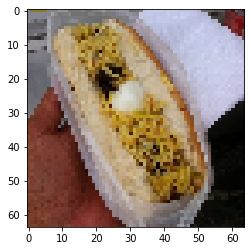

In [10]:
#dataset information
m_train = train_x_orig.shape[0] #number of training examples
num_px = train_x_orig.shape[1] #number of pixels per image
m_test = test_x_orig.shape[0] #number of test examples

#reshape Y datasets
train_y = train_y_orig.reshape((1, m_train))
test_y = test_y_orig.reshape((1, m_test))

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

plt.imshow(train_x_orig[100])

In [11]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (12288, 498)
test_x's shape: (12288, 500)


**Model Constants**

In [12]:
n_x = train_x.shape[0]     # num_px * num_px * 3
n_y = 1 # number of units in the output layer
layers_dims = [n_x, 20, 7, 5, n_y] #units in each layer
print(layers_dims)

[12288, 20, 7, 5, 1]


**Activation Functions**

In [0]:
def sigmoid(Z):
    """
    sigmoid activation in numpy
    inputs:
      Z: numpy array
    outputs:
      A: output of sigmoid(z), same shape as Z
      cache: hold Z to be used for backpropagation
    """
    A = 1/(1+np.exp(-Z))
    cache = Z
    return A, cache

def relu(Z):
    """
    RELU function.
    inputs:
      Z: output of of the linear activation
    outputs:
      A: relu(Z)
      cache: Z
    """
    A = np.maximum(0,Z)    
    cache = Z 
    return A, cache

**Cost-Gradient Functions**

In [0]:
def relu_backward(dA, cache):
    """
    backward propagation for a single RELU unit.
    inputs:
      dA: post-activation gradient, of any shape
      cache: 'Z' from forward propagation at this step
    outputs:
      dZ: gradient of the cost with respect to Z
    """
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    dZ[Z <= 0] = 0    
    return dZ

def sigmoid_backward(dA, cache):
    """
    backward propagation for a single SIGMOID unit.
    inputs:
      dA: post-activation gradient, of any shape
      cache: 'Z' from forward propagation at this step
    outputs:
      dZ: gradient of the cost with respect to Z
    """
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)    
    return dZ

**Parameter Initialization**

In [0]:
def initialize_parameters(layer_dims):
    """
    inputs:
      layer_dims: list containing the dimensions of each layer in our network
    outputs:
      parameters: python dictionary containing your parameters Wi, Bi for 1<i<=L:
          Wi: weight matrix of shape (layer_dims[l], layer_dims[l-1])
          bi: bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(5)
    parameters = {}
    L = len(layer_dims)

    #initialize parameters
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*0.25
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))    
    return parameters

**Forward Propagation**

In [0]:
def linear_forward(A, W, b):
    """
    calculates Z = W.T*X + b for one step of forward propagation
    inputs:
      A: activations from previous layer, shape = (size of previous layer, number of examples)
      W: weights matrix, shape = (size of current layer, size of previous layer)
      b: bias vector, shape = (size of the current layer, 1)
    outputs:
      Z: the linear activation function matrix 
      cache: dictionary to store the input values at this step for back propagation
    """
    Z = np.dot(W, A) + b
    cache = (A, W, b)
    return Z, cache

def linear_activation_forward(A_prev, W, b, activation):
    """
    forward propagation for the LINEAR->ACTIVATION layer
    inputs:
      A_prev: activations from previous layer, shape = (size of previous layer, number of examples)
      W: weights matrix, shape = (size of current layer, size of previous layer)
      b: bias vector, shape = (size of the current layer, 1)
      activation: the type of activation function applied to this layer
    outputs:
      A: the output of the activation function
      cache: a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    cache = (linear_cache, activation_cache)
    return A, cache

def forward_propagation(X, parameters):
    """
    forward propagation for all of the layers
    inputs:
      X: train data, shape = (input size, number of examples)
      parameters: output of initialize_parameters()
    outputs:
      AL: last post-activation value
      caches: list of caches containing the activation values
    """
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    #relu activation layers
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    
    #sigmoid activation layers
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
            
    return AL, caches


**Cost of Forward Propagation**

In [0]:
def cost_function(AL, Y):
    """
    cross-entropy cost function
    inputs:
      AL -- estimate of forward propagation, shape = (1, number of examples)
      Y -- actual classification (1 for hotdog, 0 for nothotdog), shape = (1, number of examples)
    outputs:
      cost -- cross-entropy cost
    """
    m = Y.shape[1]
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    cost = np.squeeze(cost)          
    return cost


**Back Propagation**

In [0]:
def linear_backward(dZ, cache):
    """
    linear "deactivation" for backward propagation for one layer
    inputs:
      dZ: gradient of the cost with respect to the linear output (of current layer l)
      cache: tuple of values (A_prev, W, b) coming from the forward propagation in the current layer
    Returns:
      dA_prev: gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
      dW: gradient of the cost with respect to W (current layer l), same shape as W
      db: gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)

    return dA_prev, dW, db

def linear_activation_backward(dA, cache, activation):
    """
    backward propagation for the LINEAR->ACTIVATION layer.
    inputs:
      dA: post-activation gradient for current layer l 
      cache: tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
      activation: the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    outputs:
      A_prev: Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
      dW: Gradient of the cost with respect to W (current layer l), same shape as W
      db: Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

def backward_propagation(AL, Y, caches):
    """
    backward propagation for all layers
    inputs:
      AL: output of the forward propagation
      Y: actual classification (1 for hotdog, 0 for nothotdog), shape = (1, number of examples)
      caches: list of caches containing activation caches
    Returns:
      grads: A dictionary with the gradients dA, dW, dB 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads


**Update Parameters after Back Propagation**

In [0]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters with gradient descent
    Arguments:
      parameters: python dictionary containing parameters 
      grads: python dictionary containing gradients, output of L_model_backward
      learning_rate: how much of a "step" do we take each iteration of gradient descent
    Returns:
      parameters: python dictionary containing the updated W and b
    """
    L = len(parameters) // 2 # number of layers in the neural network
    
    # Update each parameter
    for l in range(L):
        parameters["W" + str(l+1)] = parameters.get("W" + str(l+1)) - learning_rate*grads.get("dW" + str(l+1))
        parameters["b" + str(l+1)] = parameters.get("b" + str(l+1)) - learning_rate*grads.get("db" + str(l+1))
        
    return parameters


**Predictor Function**:
Uses the parameters obtained by the model to make a prediction for the output

In [0]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of the neural network.
    Arguments:
      X: data set of examples you would like to label
      y: the label of the corresponding X
      parameters: parameters of the trained model
    Returns:
      p: predictions for the given dataset X
    """
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = forward_propagation(X, parameters)
    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print accuracy
    print("Accuracy: "  + str(np.sum((p == y)/m)))   
    return p

**Model using above helper functions**

In [0]:
def model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 2500, print_cost=False):
    """
    the neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    inputs:
      X: data, numpy array of shape (num_px * num_px * 3, number of examples)
      Y: output vector, (1 if hotdog, 0 if nothotdog)
      layers_dims: list containing the input size and each layer size, of length (number of layers + 1).
      learning_rate: learning rate of the gradient descent update rule
      num_iterations: number of iterations of the optimization loop
      print_cost: if True, it prints the cost every 100 steps
    outputs:
      parameters: parameters learnt by the model. They can then be used to predict.
    """
    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization
    parameters = initialize_parameters(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = forward_propagation(X, parameters)

        # Compute cost.
        cost = cost_function(AL, Y)
    
        # Backward propagation.
        grads = backward_propagation(AL, Y, caches)

        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            costs.append(cost)
    
    return parameters

**Run the Model and Assess Accuracy**

In [43]:
parameters = model(train_x, train_y, layers_dims, num_iterations = 1600, print_cost = True)

Cost after iteration 0: 0.939585
Cost after iteration 100: 0.634744
Cost after iteration 200: 0.559525
Cost after iteration 300: 0.513151
Cost after iteration 400: 0.465920
Cost after iteration 500: 0.621774
Cost after iteration 600: 0.283490
Cost after iteration 700: 0.174452
Cost after iteration 800: 0.148068
Cost after iteration 900: 0.476585
Cost after iteration 1000: 0.292070
Cost after iteration 1100: 0.155653
Cost after iteration 1200: 0.098768
Cost after iteration 1300: 0.037415
Cost after iteration 1400: 0.014525
Cost after iteration 1500: 0.010096


In [44]:
pred_train = predict(train_x, train_y_orig, parameters)

Accuracy: 0.9919678714859439


In [45]:
pred_test = predict(test_x, test_y_orig, parameters)

Accuracy: 0.554
